In [110]:
from bs4 import BeautifulSoup as bs
from splinter import Browser
import time
import datetime
import pandas as pd
import lxml
import re

# Project Euler Problem Set EDA

This EDA is intended to give a brief introduction to the Project Euler Problems dataset, including problem difficulty breakdown, number of solvers for each problem, word maps for problem title and description text, external data/images included in the problem descriptions, and how common MathJax equations are for the problem descriptions.

The notebook is broken down into the following sections:
 - [Problem Difficulty and Solver Counts](#Problem-Difficulty-and-Solver-Counts)
 - [Problem Title and Description Text Word Maps](#Problem-Title-and-Description-Text-Word-Maps)
 - [External Data/Images/Links for Problems](#External-Data/Images/Links-for-Problems)
 - [MathJax Equation Inclusion](#MathJax-Equation-Inclusion)


In [111]:
df = pd.read_csv("./04-27-23.csv")
df

,id,title,subtitle,content,html_content,release_date,solved_by_count,difficulty
0,1,Multiples of 3 or 5,Problem 1,\nIf we list all the natural numbers below 10 ...,<p>If we list all the natural numbers below 10...,2001-10-05T18:00:00,970054,5
1,2,Even Fibonacci numbers,Problem 2,\nEach new term in the Fibonacci sequence is g...,<p>Each new term in the Fibonacci sequence is ...,2001-10-19T18:00:00,774340,5
2,3,Largest prime factor,Problem 3,"\nThe prime factors of 13195 are 5, 7, 13 and ...","<p>The prime factors of 13195 are 5, 7, 13 and...",2001-11-02T18:00:00,557877,5
3,4,Largest palindrome product,Problem 4,\nA palindromic number reads the same both way...,\n<p>A palindromic number reads the same both ...,2001-11-16T18:00:00,493994,5
4,5,Smallest multiple,Problem 5,\n2520 is the smallest number that can be divi...,<p>2520 is the smallest number that can be div...,2001-11-30T18:00:00,497316,5
...,...,...,...,...,...,...,...,...
825,826,Birds on a Wire,Problem 826,\nConsider a wire of length 1 unit between two...,<p>Consider a wire of length 1 unit between tw...,2023-01-22T10:00:00,185,45
826,827,Pythagorean Triple Occurrence,Problem 827,\n\nDefine Q(n) to be the smallest number that...,<p>\nDefine $Q(n)$ to be the smallest number t...,2023-01-28T13:00:00,147,50
827,828,Numbers Challenge,Problem 828,\nIt is a common recreational problem to make ...,<p>It is a common recreational problem to make...,2023-02-04T16:00:00,401,15
828,829,Integral Fusion,Problem 829,\nGiven any integer n>1 a binary factor tree T...,<p>Given any integer $n&gt;1$ a <i>binary fact...,2023-02-11T19:00:00,173,45


In [112]:
df["content"][56]

'\nIt is possible to show that the square root of two can be expressed as an infinite continued fraction.\n2=1+12+12+12+…\nBy expanding this for the first four iterations, we get:\n1+12=32=1.5\n1+12+12=75=1.4\n1+12+12+12=1712=1.41666…\n1+12+12+12+12=4129=1.41379…\nThe next three expansions are 9970, 239169, and 577408, but the eighth expansion, 1393985, is the first example where the number of digits in the numerator exceeds the number of digits in the denominator.\nIn the first one-thousand expansions, how many fractions contain a numerator with more digits than the denominator?\n'

In [113]:
# use HTML content as well as text content as columns (html content can be rendered correctly with MathJax in a markdown cell)
# problem 57 example

<p>It is possible to show that the square root of two can be expressed as an infinite continued fraction.</p>
<p class="center">$\sqrt 2 =1+ \frac 1 {2+ \frac 1 {2 +\frac 1 {2+ \dots}}}$</p>
<p>By expanding this for the first four iterations, we get:</p>
<p>$1 + \frac 1 2 = \frac  32 = 1.5$<br />
$1 + \frac 1 {2 + \frac 1 2} = \frac 7 5 = 1.4$<br />
$1 + \frac 1 {2 + \frac 1 {2+\frac 1 2}} = \frac {17}{12} = 1.41666 \dots$<br />
$1 + \frac 1 {2 + \frac 1 {2+\frac 1 {2+\frac 1 2}}} = \frac {41}{29} = 1.41379 \dots$<br /></p>
<p>The next three expansions are $\frac {99}{70}$, $\frac {239}{169}$, and $\frac {577}{408}$, but the eighth expansion, $\frac {1393}{985}$, is the first example where the number of digits in the numerator exceeds the number of digits in the denominator.</p>
<p>In the first one-thousand expansions, how many fractions contain a numerator with more digits than the denominator?</p>

## Problem Difficulty and Solver Counts

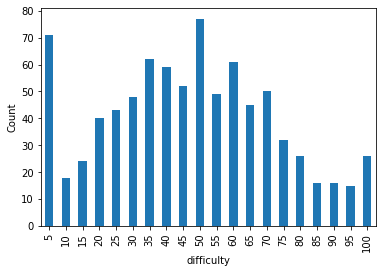

In [114]:
df.groupby(df["difficulty"]).count().plot(kind="bar", y = "id", ylabel="Count", legend=False)

As you can see, the problem difficulty distribution roughly follows a bell curve centered around 50, but weighted a little more towards the lower-difficulty problems. There are anomalies at both extremes, with there being more beginner problems (5% difficulty) than any other difficulty, other than 50%, and there being more 100% problems than 85%, 90%, or 95% problems. The weighting towards easier difficulties and the large number of beginner problems suggest that the Project Euler problems are designed to ramp up, with users getting more key concepts introduced and practiced early in their journey (at the 5% level especially, and also lower than 50%) before approaching the relatively fewer higher-level problems.

In [115]:
(df.groupby(df["difficulty"])["id"].count()/len(df))*(100)

difficulty
5      8.554217
10     2.168675
15     2.891566
20     4.819277
25     5.180723
30     5.783133
35     7.469880
40     7.108434
45     6.265060
50     9.277108
55     5.903614
60     7.349398
65     5.421687
70     6.024096
75     3.855422
80     3.132530
85     1.927711
90     1.927711
95     1.807229
100    3.132530
Name: id, dtype: float64

The problem difficulty distribution ranges from about 2% to about 9% of all problems accounted for at any specific difficulty level, while an even distribution would call for about 5% of all problems to be accounted for at each difficulty level. So the variation is not extreme, but sufficient to make the chart above which resembles a bell curve distribution - due to the differences in problem counts per difficulty level. 

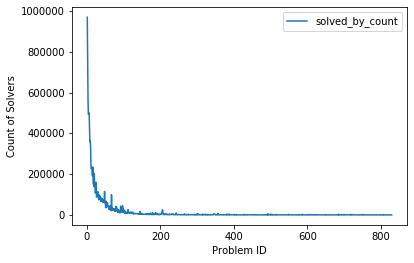

In [116]:
df.plot(x="id", y="solved_by_count", xlabel="Problem ID", ylabel="Count of Solvers")

The solver count curves drops off sharply after about 10-20 problems solved - suggesting the vast majority of users get started on Project Euler with maybe 20 easy problems, and then quit. This is understandable - I had solved about 5 problems initially when I found Project Euler earlier in my career, not seeing the point in solving these math-heavy, academic code puzzles, but returned after a few years to further develop my problem solving and computer programming skills. 

## Problem Title and Description Text Word Maps

In [117]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [118]:
# define word map generator function
def make_word_map(col, df):
    comment_words = ''
    stopwords = set(STOPWORDS)

    # iterate through the csv file
    for val in df[col]:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

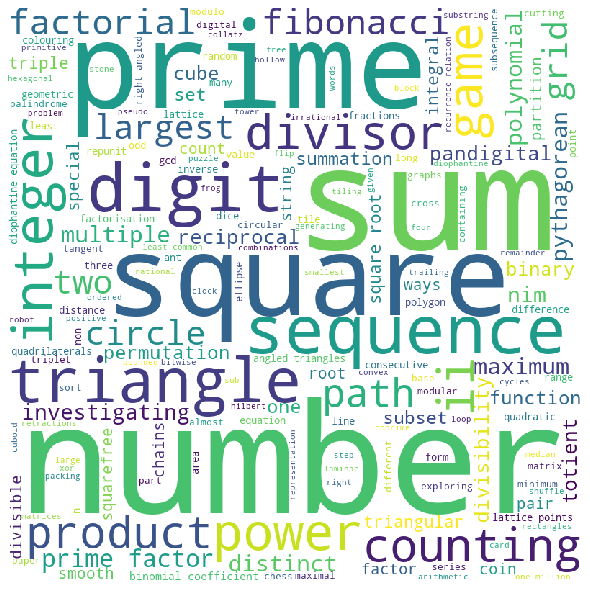

In [119]:
make_word_map("title", df)

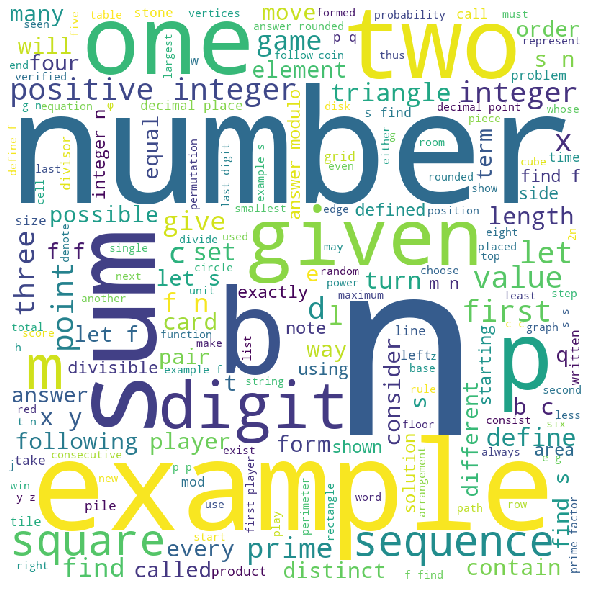

In [120]:
make_word_map("content", df)

These word maps for the problem titles and descriptions contain many math terms, like **number, digit, prime, integer** but also many terms related to games like **game, player, card, score, dice** that you might not expect, although game theory may technically be termed part of mathematics...

## External Data/Images/Links for Problems

In [121]:
data_check5 = df["html_content"].str.contains(r"\.[a-zA-Z]{3}\b")

print(sum(data_check5))

186


There are 186 problems that use some kind of external data (link, image, or data file) out of all the problems in the Project Euler dataset, representing about 20% of the problem set.

In [122]:
extensions = set()

for content in df["html_content"][data_check5]:
    vals = re.findall(r"(\.[a-zA-Z]{3}\b)", content)
    extensions = extensions | set(tuple(vals))
    
extensions

{'.com', '.gif', '.jpg', '.net', '.org', '.png', '.txt'}

In [123]:
from collections import Counter
# counts of each of these external sources
image_counts = Counter()
total = 0
for content in df["html_content"][data_check5]:
#     print(content)
    total += 1
    vals = re.findall(r"(\.[a-zA-Z]{3}\b)", content)
    
#     image_counts.update(Counter(vals)) # for total number of each item in the dataset
    image_counts.update(dict([(a, 1) for a in set(tuple(vals))]))# for number of problems containing at least one of the items
    
print(total)
image_counts

186


Counter({'.net': 185,
         '.png': 78,
         '.txt': 20,
         '.gif': 70,
         '.org': 2,
         '.jpg': 17,
         '.com': 1})

The above cell tabulates the number of problems that use each extension in the problem set. There are only 7 different extensions used, and almost every problem with data (except for one) contains a **.net** extension - this is usually the projecteuler.net website used to store the images and data. The data is always stored with a **.txt** extension - not .csv or any other file format. Images are stored/linked with **.png, .jpg, and .gif** extensions - .png may have been used at the beginning and then the image file types changed over time, but I have not personally checked out this hypothesis. Finally, there are rare external links to sites ending in **.org** and **.com** - mostly for flavor around the problem descriptions.

In [124]:
data_counts = pd.Series(index=image_counts.keys(), data=image_counts.values())
data_counts = data_counts.sort_values(ascending=False)
data_counts

.net    185
.png     78
.gif     70
.txt     20
.jpg     17
.org      2
.com      1
dtype: int64

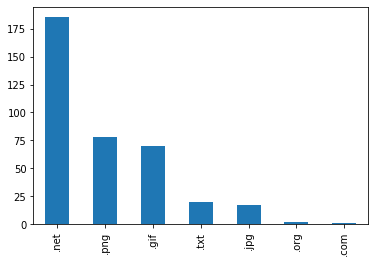

In [125]:
data_counts.plot(kind="bar")

In [126]:
df["html_content"][df["html_content"].str.contains(r"\.(org|com)\b")]

C:\Users\patri\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


313    <p>\nThe moon has been opened up, and land can...
338    <p>\n<i>"And he came towards a valley, through...
423    <div class="center"><img src="https://projecte...
Name: html_content, dtype: object

Above problems contain external links to either **.com** or **.org** websites (note that problems numbers are 0-based indexed, as opposed to Project Euler's 1-based index), for further investigation.

## MathJax Equation Inclusion

In [127]:
# mathjax problem count
mathjax_check = df["html_content"].str.contains(r"\$.*\.*\$")

print(sum(mathjax_check))

349


There are 349 problems on Project Euler that include MathJax as part of their description, which represents a significant amount of problems out of the entire problem set.

In [128]:
df["html_content"][df["html_content"].str.contains(r"\$.*\.*\$")]

5      <p>The sum of the squares of the first ten nat...
26     <p>Euler discovered the remarkable quadratic f...
52     <p>There are exactly ten ways of selecting thr...
56     <p>It is possible to show that the square root...
63     <p>All square roots are periodic when written ...
                             ...                        
825    <p>Consider a wire of length 1 unit between tw...
826    <p>\nDefine $Q(n)$ to be the smallest number t...
827    <p>It is a common recreational problem to make...
828    <p>Given any integer $n&gt;1$ a <i>binary fact...
829    <p>\nLet $\displaystyle S(n)=\sum\limits_{k=0}...
Name: html_content, Length: 349, dtype: object

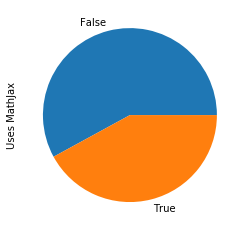

In [129]:
mathjax_check.value_counts().plot(kind="pie", label="Uses MathJax")

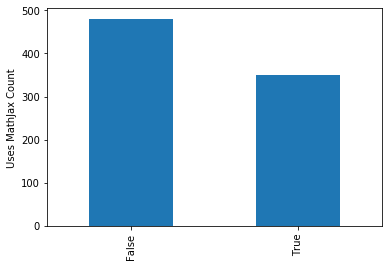

In [130]:
mathjax_check.value_counts().plot(kind="bar", ylabel="Uses MathJax Count")

MathJax is present in about 40% of the problem descriptions on Project Euler, and is much more common that external links, images, or data. This notation is used to write mathematical equations within HTML, so that equations are represented correctly on websites. Clearly, Project Euler relies heavily on mathematical equations, considering how many problems use MathJax out of the total problem set, suggesting that plain English (or other natural languages) would not suffice for fully proposing the problems to the users.